# Classification task

# Importing libraries, first look at data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sehriyarmemmedli/binaaz-sale-project")

print("Path to dataset files:", path, '\n')
df = pd.read_csv(path + '/house_sale.csv')

print(f'data shape: {df.shape}', '\n')
df = df.sample(60_000)
print(f'subsample of data that will be worked on: {df.shape}')

Path to dataset files: /root/.cache/kagglehub/datasets/sehriyarmemmedli/binaaz-sale-project/versions/1 

data shape: (100775, 51) 

subsample of data that will be worked on: (60000, 51)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 26574 to 24075
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_x                 60000 non-null  object 
 1   rel_url              60000 non-null  object 
 2   estate_rel_url_x     60000 non-null  object 
 3   datetime_scrape_x    60000 non-null  object 
 4   price                60000 non-null  float64
 5   currency_x           60000 non-null  object 
 6   location             60000 non-null  object 
 7   attributes           60000 non-null  object 
 8   city_when            60000 non-null  object 
 9   city                 60000 non-null  object 
 10  day_x                60000 non-null  object 
 11  hour_x               60000 non-null  object 
 12  repair               48618 non-null  object 
 13  vip                  5170 non-null   object 
 14  featured             1887 non-null   object 
 15  products_label       43210 non-null  

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
Binanın növü,59907
featured,58113
vip,54830
hour_y,50765
Torpaq sahəsi,50689
İpoteka,40444
mortgage,40444
shop_title,17154
shop_name,17154
products_label,16790


In [ ]:
df.columns

Index(['id_x', 'rel_url', 'estate_rel_url_x', 'datetime_scrape_x', 'price',
       'currency_x', 'location', 'attributes', 'city_when', 'city', 'day_x',
       'hour_x', 'repair', 'vip', 'featured', 'products_label', 'bill_of_sale',
       'mortgage', 'img_url', 'id_y', 'estate_id', 'estate_rel_url_y',
       'datetime_scrape_y', 'description', 'unit_price', 'total_price',
       'currency_y', 'owner_name', 'owner_title', 'shop_name', 'shop_title',
       'address', 'lat', 'lng', 'updated', 'views', 'day_y', 'hour_y',
       'estate_details_id_x', 'Binanın növü', 'Kateqoriya', 'Mərtəbə',
       'Otaq sayı', 'Sahə', 'Torpaq sahəsi', 'Təmir', 'Çıxarış', 'İpoteka',
       'estate_details_id_y', 'estate_rel_url', 'extra_info'],
      dtype='object')

# Cleaning

In [ ]:
df = df.drop(columns=['id_x', 'rel_url', 'estate_rel_url_x', 'datetime_scrape_x', 'currency_x', 'city_when', 'day_x', 'hour_x',\
'img_url', 'id_y', 'estate_id', 'estate_rel_url_y', 'datetime_scrape_y', 'description', 'total_price', 'owner_name', 'owner_title',\
'shop_name', 'shop_title', 'address', 'updated', 'views', 'day_y', 'hour_y', 'estate_details_id_x', 'Binanın növü', 'Mərtəbə',\
'attributes', 'İpoteka', 'estate_details_id_y', 'estate_rel_url', 'extra_info', 'currency_y', 'unit_price', 'bill_of_sale', 'featured', 'vip',\
                      'lat', 'lng'])

df = df[~(df['Otaq sayı'].isna())]

df = df[~(df['Təmir'].isna())]

df = df[df['city']=='bakı']

df['mortgage'] = df.loc[:, 'mortgage'].fillna(value='ipoteka yoxdur')  # mortgage, imputing with 'ipoteka yoxdur'


df['products_label'] = df.loc[:, 'products_label'].fillna(value='Makler')

df['repair'] = df.loc[:, 'repair'].fillna(value='Təmirsiz')

df['Sahə'] = df.loc[:, 'Sahə'].apply(lambda x: x.split(' ')[0]).astype(float)  # Sahə column was messy, needed processing

df['Torpaq sahəsi'] = df.loc[:, 'Torpaq sahəsi'].astype(object).fillna(value='0 sot').apply(lambda x: x.split(' ')[0]).astype(float)

df['Çıxarış'] = df.loc[:, 'Çıxarış'].replace(['var', 'yoxdur'], [1, 0])

df['price'] = df.loc[:, 'price'].apply(np.log1p).astype(float)

<ipython-input-53-9e0c2bd2712c>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Çıxarış'] = df.loc[:, 'Çıxarış'].replace(['var', 'yoxdur'], [1, 0])


# Visualization

## Quick look at data distribution

In [ ]:
for col in df.columns:
  print(df[col].value_counts(normalize=True).sort_values(ascending=False)[:10])

## ~ Categorical columns visualization

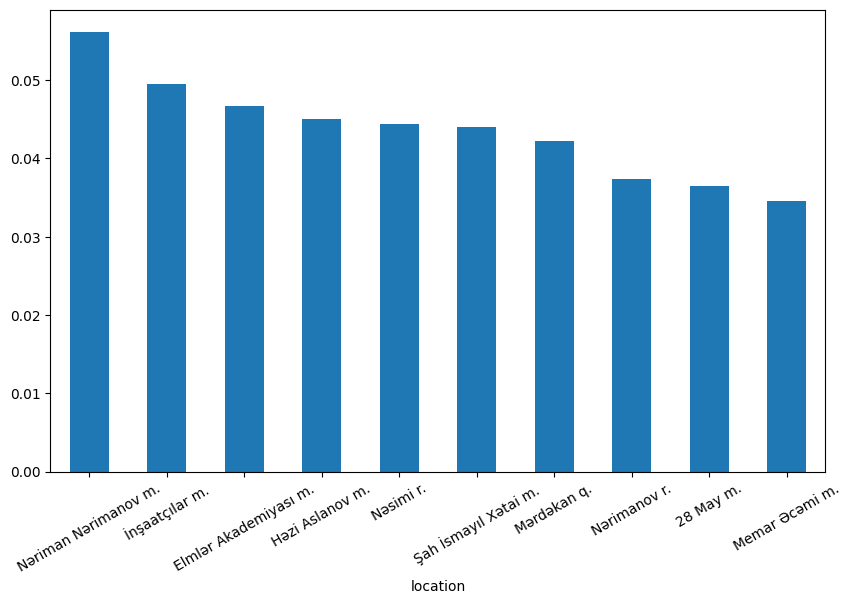

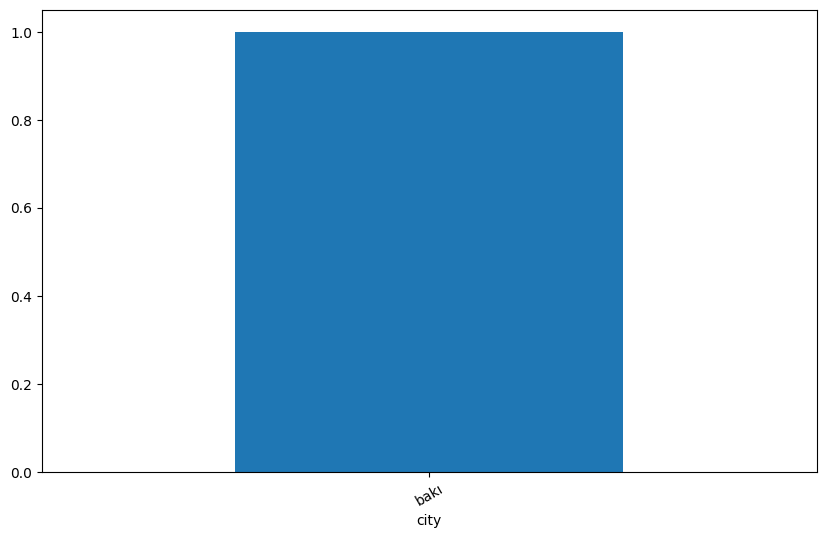

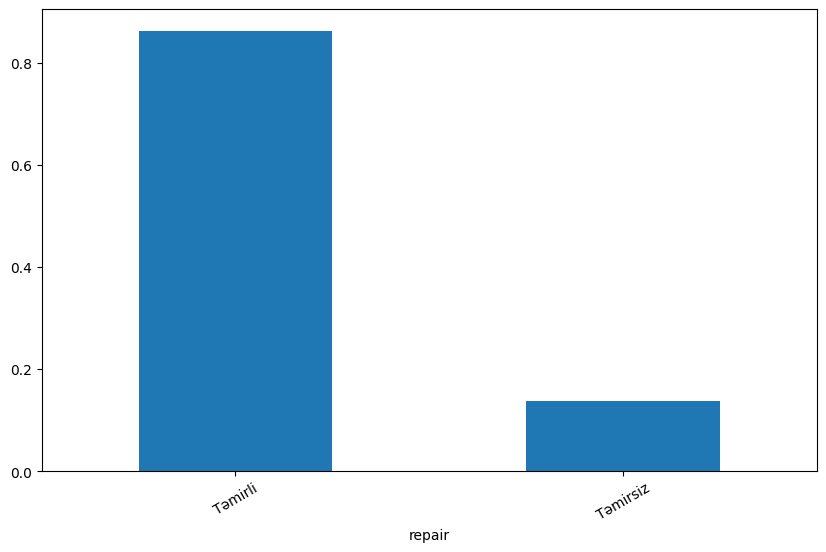

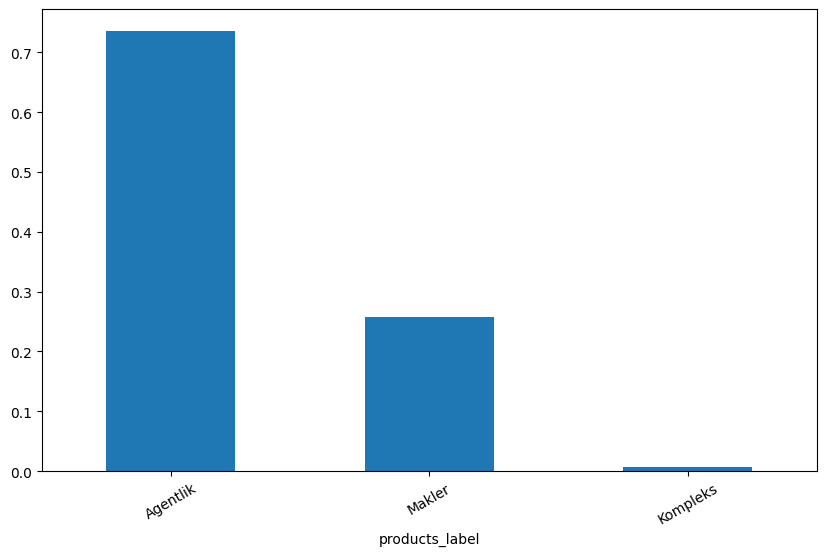

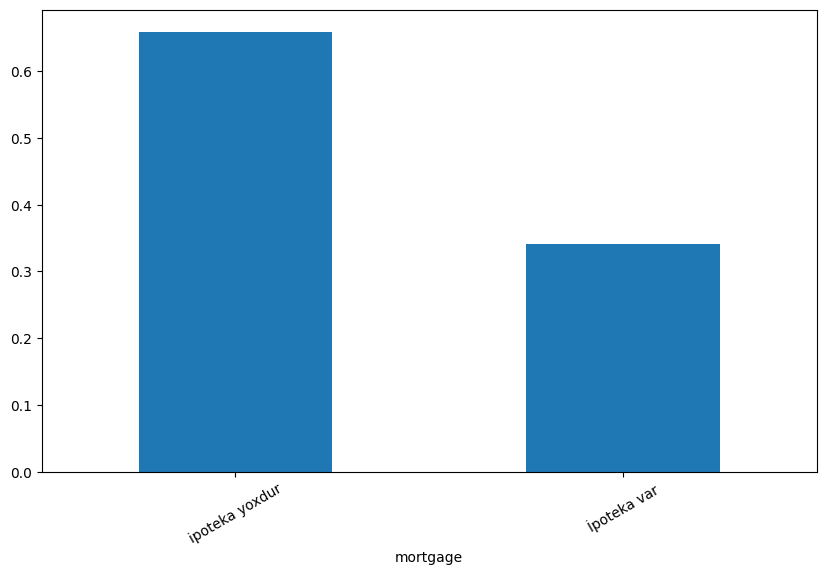

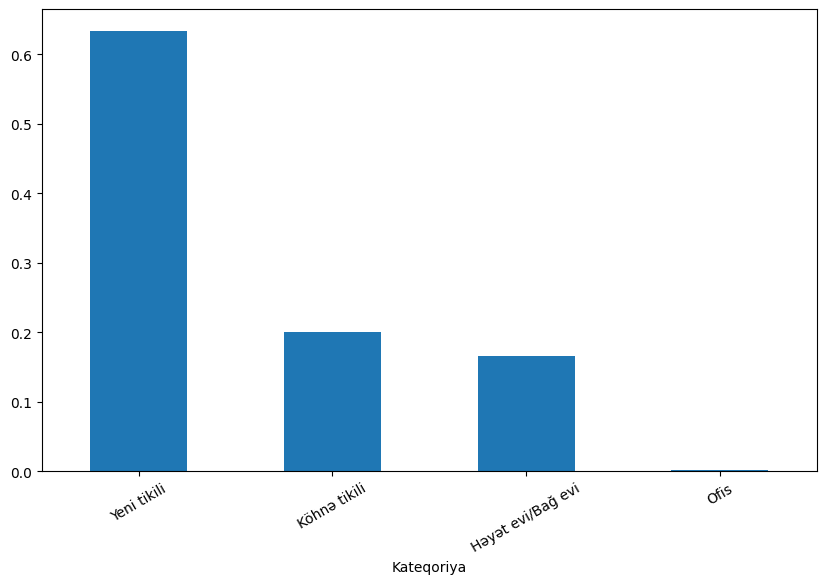

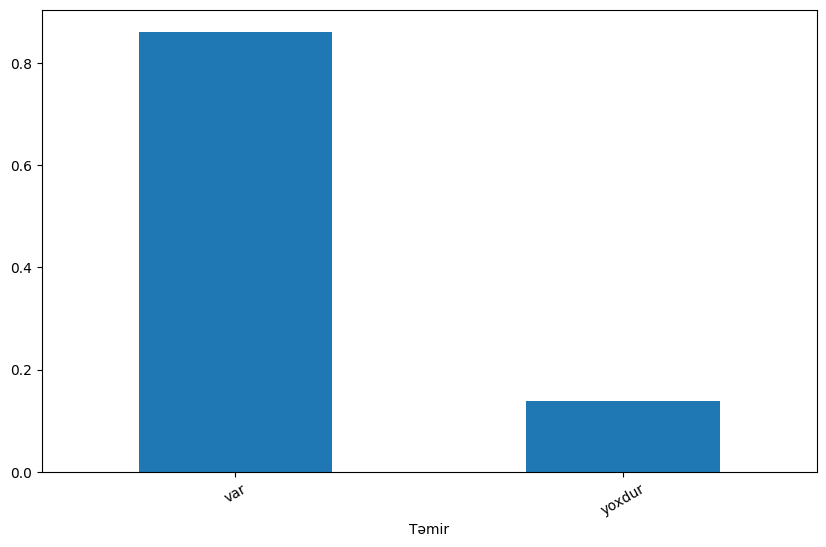

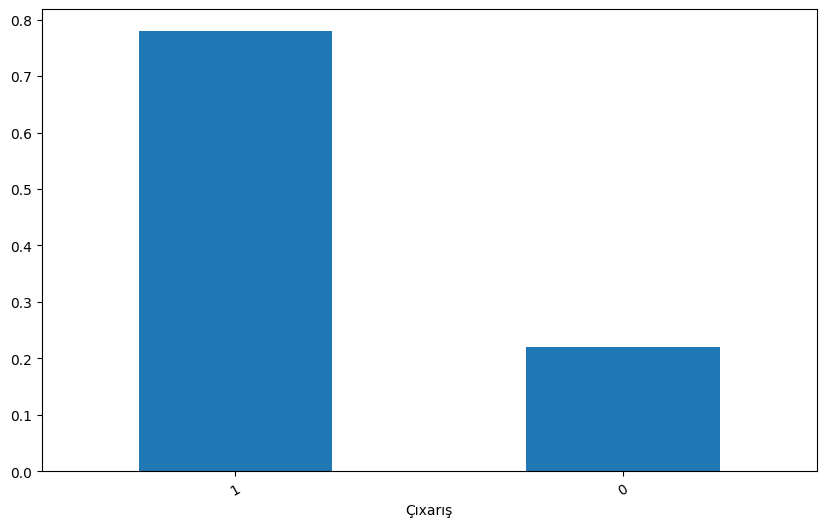

<ipython-input-56-256825707ae8>:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df[col].value_counts(normalize=True).sort_values(ascending=False)[:10].plot.bar(rot=30, figsize=(10, 6))


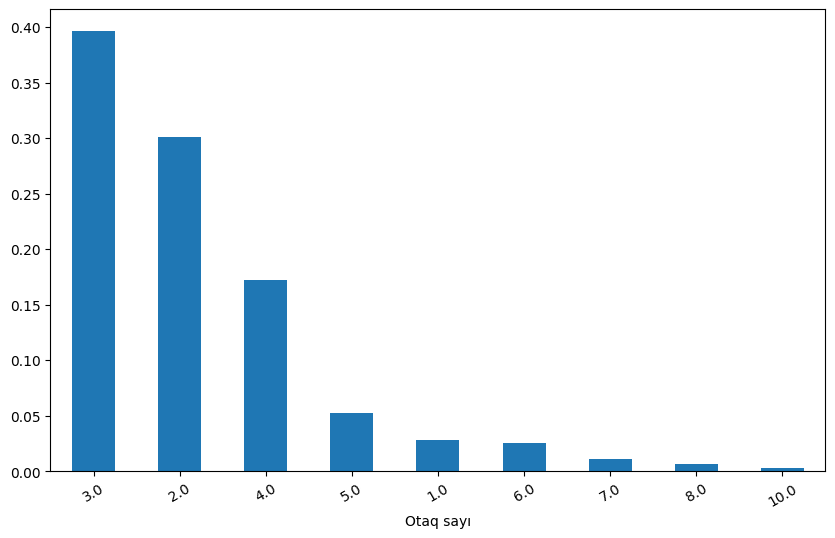

In [ ]:
for col in df.select_dtypes(exclude=[np.number]).columns.to_list()+['Çıxarış', 'Otaq sayı']:
  df[col].value_counts(normalize=True).sort_values(ascending=False)[:10].plot.bar(rot=30, figsize=(10, 6))
  plt.show()
  print('\n'*3)

## Numerical columns histograms

<Axes: ylabel='Frequency'>

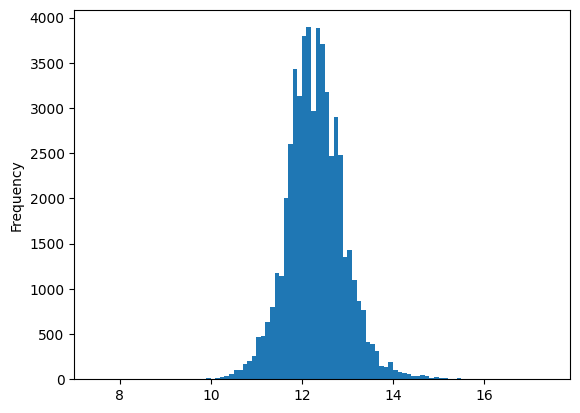

In [ ]:
df['price'].plot.hist(bins=[i/10 for i in range(75, 175)])

<Axes: ylabel='Frequency'>

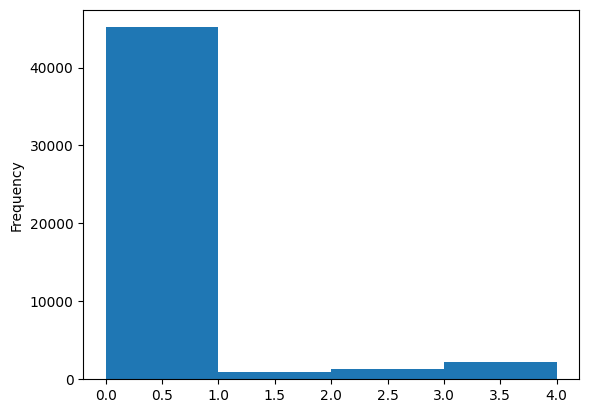

In [ ]:
df['Torpaq sahəsi'].plot.hist(bins=[i for i in range(0, 5)])

# Last Check

In [ ]:
df.select_dtypes(include=[np.number]).columns

Index(['price', 'Otaq sayı', 'Sahə', 'Torpaq sahəsi', 'Çıxarış'], dtype='object')

In [ ]:
for col in df.select_dtypes(exclude=[np.number]).columns:
  print(col, '  ', df[col].value_counts().shape[0])

location    132
city    1
repair    2
products_label    3
mortgage    2
Kateqoriya    4
Təmir    2


In [ ]:
df.shape

(53765, 12)

In [ ]:
df.isna().sum()

,0
price,0
location,0
city,0
repair,0
products_label,0
mortgage,0
Kateqoriya,0
Otaq sayı,0
Sahə,0
Torpaq sahəsi,0


# Preprocessing, Model testing (using PCA)

PCA was implemented because column numbers were high. With high dimensions, models tend to perform poorly.

In [ ]:
X = df.drop('Çıxarış', axis=1)  # variable
y = df['Çıxarış']  # target

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


columns before PCA: 144 
 columns after PCA: 28

 Train-Test scores and model evaluation 




Scoring metrics: f1, precision and recall.
Logistic Regression model: 


Logistic Regression f1 score:  0.8937759652399283 

Logistic Regression precision score 0.8582827025839982 

Logistic Regression recall score 0.9323314249363868 



Scoring metrics: f1, precision and recall.
Decision Tree Classifier model: 


Decision Tree Classifier f1 score:  0.9277469345368854 

Decision Tree Classifier precision score 0.9320279271326539 

Decision Tree Classifier recall score 0.9235050890585241 





/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 29342, number of negative: 8293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 37635, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.779647 -> initscore=1.263608
[LightGBM] [Info] Start training from score 1.263608


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Scoring metrics: f1, precision and recall.
LightGBMClassifier model: 


LightGBMClassifier f1 score:  0.9212380766984621 

LightGBMClassifier precision score 0.9025097261423449 

LightGBMClassifier recall score 0.9407601781170484 



Scoring metrics: f1, precision and recall.
Random Forest Classifier model: 


Random Forest Classifier f1 score:  0.9394465031932508 

Random Forest Classifier precision score 0.9315871774824082 

Random Forest Classifier recall score 0.9474395674300254 



Plotting Metrics 






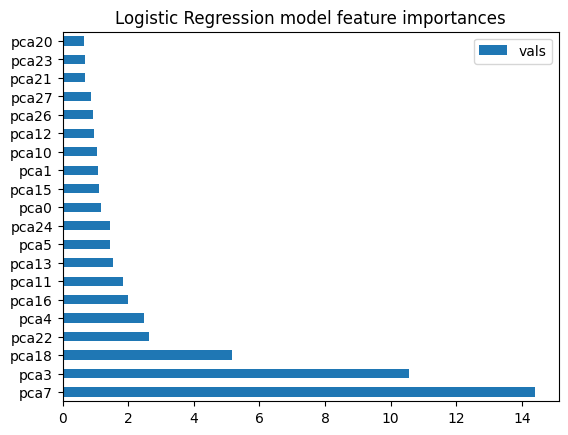

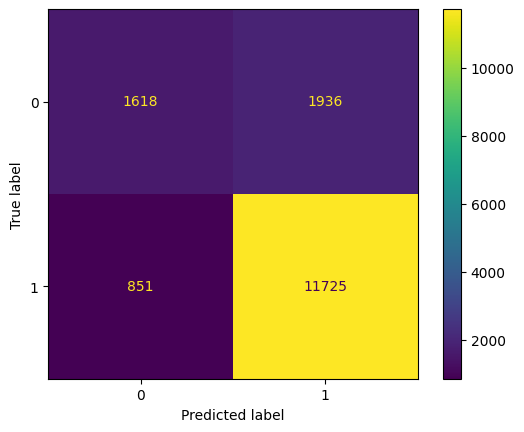

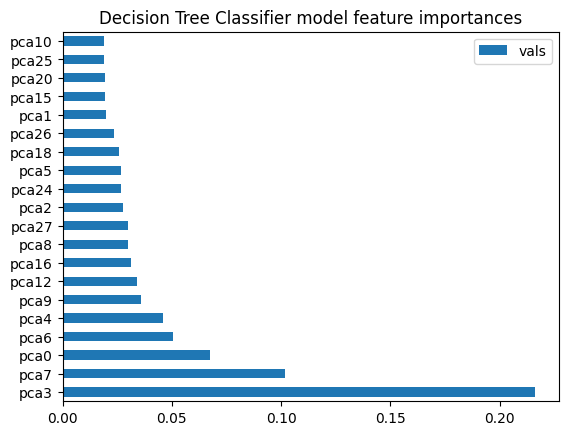

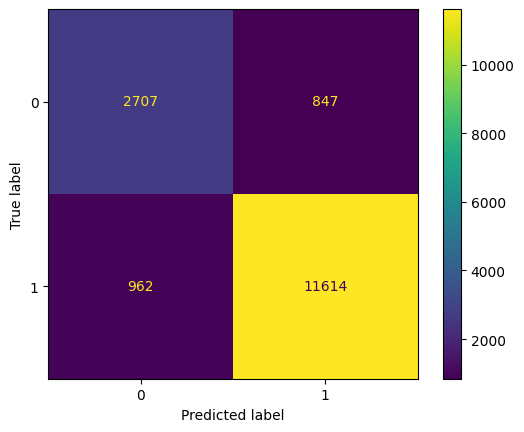

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


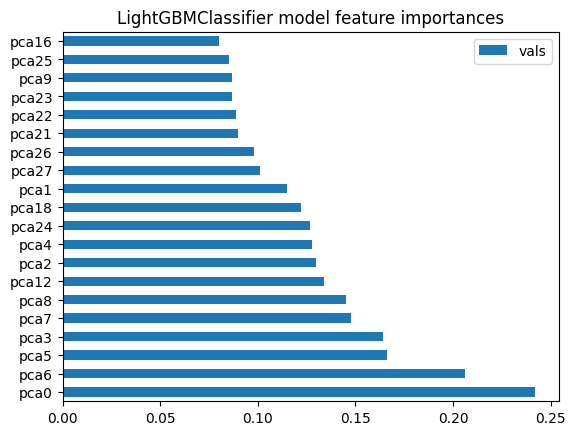

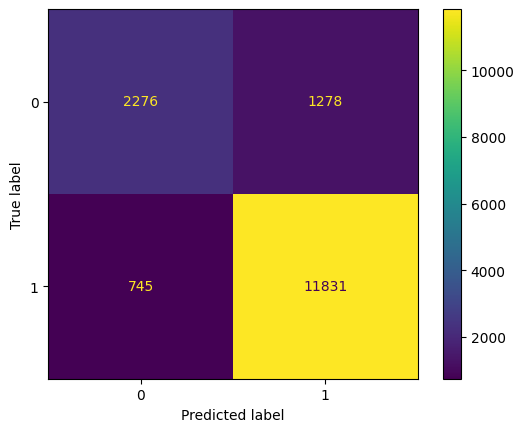

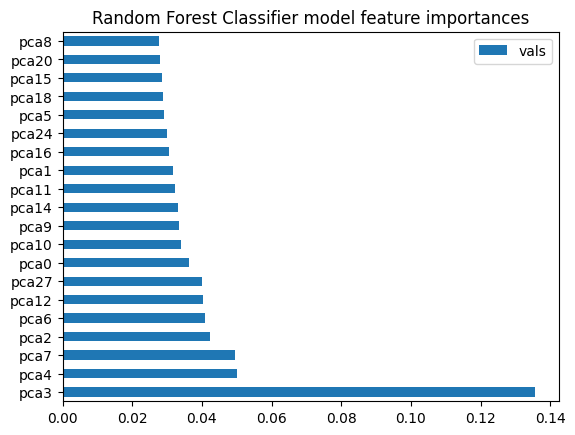

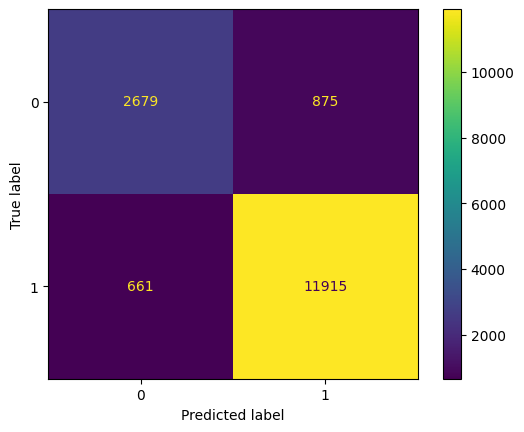

In [ ]:
# importing needed libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier


# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# selecting columns for their datatype
cat_cols = X.select_dtypes(exclude=[np.number]).columns
num_cols = X.select_dtypes(include=[np.number]).columns


# ColumnTransformer instance.
ct = ColumnTransformer(
    [
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols),
        ('scale', StandardScaler(), num_cols)
    ]
)

# Principal Component Analysis
pca = PCA(n_components=0.95)  # PCA() object
X_train_transformed = ct.fit_transform(X_train)  # Intermediary transforming steps
X_train_reduced = pca.fit_transform(X_train_transformed)  # applying PCA transformation while trying to keep 95% variance
X_test_reduced = pca.transform(ct.transform(X_test))  # Same thing to test (not .fit_transform, only .transform)



# How much columns reduced in number?
print(f'columns before PCA: {X_train_transformed.shape[1]}', '\n', f'columns after PCA: {X_train_reduced.shape[1]}')


# objects
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_jobs=-1)
lgbm_clf = LGBMClassifier(n_jobs=-1)
log_reg = LogisticRegression()


# dict of objects
name_model_dict = {
    'Logistic Regression': log_reg,
    'Decision Tree Classifier': dtc,
    'LightGBMClassifier': lgbm_clf,
    'Random Forest Classifier': rfc
}



print('\n', 'Train-Test scores and model evaluation', '\n'*4)

# iterating the dict, returning scores and plots
for name, model in name_model_dict.items():
  model.fit(X_train_reduced, y_train)  # fitting model
  y_preds = model.predict(X_test_reduced)  # predicting test data

  print('Scoring metrics: f1, precision and recall.')
  print(f'{name} model:', '\n'*2)
  print(f'{name} f1 score: ', f1_score(y_test, y_preds), '\n')  # f1
  print(f'{name} precision score', precision_score(y_test, y_preds), '\n')  # precision
  print(f'{name} recall score', recall_score(y_test, y_preds), '\n'*3)  # recall




print('Plotting Metrics', '\n'*4)




# iterating again
for name, model in name_model_dict.items():

  if name == 'Logistic Regression':  # different case for Logistic Regression. Feature importances were 'odds ratio', which are: np.exp(coefficients)
    y_preds = model.predict(X_test_reduced)  # predicting
    coef_ = model.coef_.flatten()  # 1D array
    feat_ = pca.get_feature_names_out()  # names of features
    exps_ = np.exp(coef_)  # exponential

    # Visualizing a created DataFrame of ~feature importances
    pd.DataFrame(index=feat_, data=exps_, columns=['vals'])\
    .sort_values(by='vals', ascending=False).head(20).plot.barh(title=f'{name} model feature importances')

    cm = confusion_matrix(y_test, y_preds, labels=model.classes_)  # confusion matrix
    dist = ConfusionMatrixDisplay(cm, display_labels=model.classes_)  # plotting confusion matrix
    dist.plot()
    plt.show()
    print('\n'*3)


  elif name == 'LightGBMClassifier':  # case for LightGBMClassifier
    y_preds = model.predict(X_test_reduced)  # predicting
    feat_ = pca.get_feature_names_out()  # feature names

    # DataFrame visualization
    pd.DataFrame(index=feat_, data=(model.feature_importances_ / 1_000), columns=['vals'])\
    .sort_values(by='vals', ascending=False).head(20).plot.barh(title=f'{name} model feature importances')

    cm = confusion_matrix(y_test, y_preds, labels=model.classes_)  # confusion matrix
    dist = ConfusionMatrixDisplay(cm, display_labels=model.classes_)  # plotting confusion matrix
    dist.plot()
    plt.show()
    print('\n'*3)


  else:  # Decision Tree and Random Forest, no exceptional cases
    y_preds = model.predict(X_test_reduced)  # predicting
    feat_ = pca.get_feature_names_out()  # feature names

    # DataFrame visualization
    pd.DataFrame(index=feat_, data=model.feature_importances_, columns=['vals'])\
    .sort_values(by='vals', ascending=False).head(20).plot.barh(title=f'{name} model feature importances')

    cm = confusion_matrix(y_test, y_preds, labels=model.classes_)  # confusion matrix
    dist = ConfusionMatrixDisplay(cm, display_labels=model.classes_)  # plotting confusion matrix
    dist.plot()
    plt.show()
    print('\n'*3)




## Which models were used and why

**For Classification**
\
\
\
\
\
Logistic Regression - - - - - > Fast, simple, understandable, good for binary classification, catches linear relationships (between features and log-likelihood(1 / 1+exp(x))) and non-linear relationships can be introduced, a little flexibility for non-linear relationships.
\
\
\
Decision Tree - - - - - > does not require scaling of numerical data, can understand complex relationships, interpretable, okay to understand, has feature_importances.
\
\
\
Random Forest - - - - - > Bagging prevents overfitting, scalable, interpretability is less important.
\
Following advantages come from decision trees as a base model: does not require scaling of numerical data, can understand complex relationships, has feature_importances.
\
\
\
LightGBM - - - - - > Gradient Boosting algorithm, very fast, too many changeable parameters is great for searching an exact space when hyperparameter tuning.
\
Following advantages come from decision trees as a base model: does not require scaling of numerical data, can understand complex relationships, has feature_importances

# Cross - Validation

In [ ]:
from sklearn.model_selection import cross_validate



for name, model in name_model_dict.items():
  print(f'{name} model:', '\n')
  print(cross_validate(model, X_train_reduced, y_train, cv=3, scoring=['f1', 'recall', 'precision']), '\n'*3)



Logistic Regression model: 

{'fit_time': array([0.29531765, 0.38396597, 0.28519297]), 'score_time': array([0.02740645, 0.03328562, 0.0274477 ]), 'test_f1': array([0.89953787, 0.9015911 , 0.90062918]), 'test_recall': array([0.91911312, 0.92773558, 0.92568261]), 'test_precision': array([0.88077907, 0.87687979, 0.87689615])} 



Decision Tree Classifier model: 

{'fit_time': array([11.00828195, 10.22037053, 11.40621686]), 'score_time': array([0.02361584, 0.02205491, 0.021703  ]), 'test_f1': array([0.91892728, 0.91840099, 0.91932574]), 'test_recall': array([0.91449394, 0.91500719, 0.91531513]), 'test_precision': array([0.92340381, 0.92182006, 0.92337165])} 



LightGBMClassifier model: 



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19484, number of negative: 5578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26775
[LightGBM] [Info] Number of data points in the train set: 25062, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.777432 -> initscore=1.250763
[LightGBM] [Info] Start training from score 1.250763


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19484, number of negative: 5579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26775
[LightGBM] [Info] Number of data points in the train set: 25063, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.777401 -> initscore=1.250584
[LightGBM] [Info] Start training from score 1.250584


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19484, number of negative: 5579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26775
[LightGBM] [Info] Number of data points in the train set: 25063, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.777401 -> initscore=1.250584
[LightGBM] [Info] Start training from score 1.250584


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


{'fit_time': array([2.73061967, 2.77431345, 6.04378104]), 'score_time': array([0.07304668, 0.0739882 , 0.07282639]), 'test_f1': array([0.92244692, 0.9240002 , 0.92445248]), 'test_recall': array([0.93646069, 0.94036132, 0.9445699 ]), 'test_precision': array([0.90884638, 0.90819867, 0.90517411])} 



Random Forest Classifier model: 

{'fit_time': array([32.65537834, 36.81130433, 38.01727033]), 'score_time': array([0.18590283, 0.21467876, 0.21424031]), 'test_f1': array([0.93697521, 0.93584104, 0.9359839 ]), 'test_recall': array([0.9507288 , 0.95001026, 0.95452679]), 'test_precision': array([0.92361388, 0.92208827, 0.91814771])} 





## Which metrics were used and their meaning

Precision - - - - - > How well model predicts the output.
\
(90% precision - - -> model is correct 9 out of 10 times at predicting the correct output)
True Positives / (True Positives + False Positives)

\
\
\
Recall - - - - - > How many samples did model find in a class.
\
(90% recall - - - > model's finding rate for the class is 9 out of 10, meaning that model found 90% of a class)

True Positives / (True Positives + False Negatives)
\
\
\
f1 - - - - - > Harmonic mean of precision and recall. Higher f1 indicates better performance for the model.

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV



params_lgbm_clf = {
 'colsample_bytree': [1.0, 0.8],
 'learning_rate': [0.05, 0.1, 0.2],
 'max_depth': [50, 100, -1],
 'n_estimators': [100, 150, 200],
}



grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=params_lgbm_clf, cv=3, n_jobs=-1, scoring='f1')
grid_search.fit(X_train_reduced, y_train)
print(f'best params for LightGBMClassifier: {grid_search.best_params_}')
print(f'best score for LightGBMClassifier: {grid_search.best_score_}')
print(f'score of best estimator on test data: {grid_search.best_estimator_.score(X_test_reduced, y_test)}')







params_rfc = {
        'max_depth': [None, 50, 100],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 5, 10],
        'n_estimators': [100, 200],
}


grid_search = GridSearchCV(estimator=rfc, param_grid=params_rfc, cv=3, n_jobs=-1, scoring='f1')
grid_search.fit(X_train_reduced, y_train)
print(f'best params for Random Forest Classifier: {grid_search.best_params_}')
print(f'best score for Random Forest Classifier: {grid_search.best_score_}')
print(f'score of best estimator on test data: {grid_search.best_estimator_.score(X_test_reduced, y_test)}')



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 29342, number of negative: 8293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 37635, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.779647 -> initscore=1.263608
[LightGBM] [Info] Start training from score 1.263608
best params for LightGBMClassifier: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 50, 'n_estimators': 200}
best score for LightGBMClassifier: 0.9278450914992472
score of best estimator on test data: 0.8931804091754495


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


best params for Random Forest Classifier: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}
best score for Random Forest Classifier: 0.9326225073683646
score of best estimator on test data: 0.9048977061376318


## Tuned hyperparameters' meaning

**LightGBM**
\
\
'colsample_bytree' - - - - - > Subsample ratio of columns when constructing each tree.
\
Decreasing it can lead to better generalization by the model.
\
\
\
'learning_rate' - - - - - > Optimizable parameter for gradient boosting algorithm.
\
Decreasing can lead to better results and convergence will be likely, but time complexity will be higher.
\
\
\
'max_depth' - - - - - > Depth of each tree.
\
Increasing can cause overfitting.
\
\
\
'n_estimators' - - - - - > Number of sequential base learners, more precisely, boosting rounds.
\
Increasing can cause overfitting. Needs to be controlled properly.
\
\
\
\
\
\
**Random Forest**
\
\
'max_depth' - - - - - > Depth of each tree.
\
Increasing can cause overfitting.
\
\
\
'max_features' - - - - - > Number of selected features by each tree.
\
Increasing can give better results at the risk of overfitting if not selected properly.
\
\
\
'min_samples_leaf' - - - - - > Minimum number of samples at each leaf for the splitting.
\
Increasing can lead to better generalization, if not controlled properly, may underfit.
\
\
\
'n_estimators' - - - - - > Number of base estimators.
\
Increasing can give better results, but with the risk of overfitting.
\
\
\